# Last name analysis

The *Social Security Administration* publishes stats on first names for new borns. They show the top 1,000 on their web page, but you can [download a more complete dataset](https://www.ssa.gov/oact/babynames/limits.html) which includes every name that was at least seen 5 times.

Note: The data was first recorded in 1937, data in the dataset prior to that (it goes back to 1879) is retroactively determined by birth data, so it only shows the population still alive in 1937. That's why I'm only using 1937+ data.

In [13]:
import pandas as pd
from glob import glob
from tqdm import tqdm_notebook as tqdm
import holoviews as hv
hv.extension('matplotlib')
# NOTE: Change this to hv.extension('bokeh') for prettier output and zooming etc., and to get rid off

%output size=300
%opts Curve [height=160 width=300 tools=['hover']]
%opts Bars [width=300 height=120 tools=['hover']]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Unexpected plot option 'tools' for Curve in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplotlib' renderer are: ['apply_extents', 'apply_ranges', 'apply_ticks', 'aspect', 'autotick', 'bgcolor', 'fig_alpha', 'fig_bounds', 'fig_inches', 'fig_latex', 'fig_rcparams', 'fig_size', 'final_hooks', 'finalize_hooks', 'fontsize', 'initial_hooks', 'interpolation', 'invert_axes', 'invert_xaxis', 'invert_yaxis', 'invert_zaxis', 'labelled', 'logx', 'logy', 'logz', 'normalize', 'projection', 'relative_labels', 'show_frame', 'show_grid', 'show_legend', 'show_title', 'sublabel_format', 'sublabel_position', 'sublabel_size', 'title_format', 'xaxis', 'xrotation', 'xticks', 'yaxis', 'yrotation', 'yticks', 'zaxis', 'zrotation', 'zticks']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.Unexpected plot option 'tools' for Bars in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplotl

## Let's read the data

I used the [national data set](https://www.ssa.gov/oact/babynames/names.zip) which consists of one file per year.

In [2]:
slices = []

print("Reading files...")
pbar = tqdm(glob('names/*.txt'))
for fname in pbar:
    year = int(fname[-8:-4])
    assert(1880 <= year <= 2017)
    if year<1937: continue #Not so good data till 1937.
    pbar.set_description_str(f"Processing '{fname}'...")
    temp = pd.read_csv(fname, header=None, names=['name','sex','count'])
    temp['year'] = year
    slices.append(temp)
    
print("Merging files...")

names = pd.concat(slices)

print(f"{names.shape[0]:,} rows read.")

Reading files...



Merging files...
1,585,258 rows read.


We want to look at the last name of letters, so let's add that to the dataset.

In [3]:
names['last_letter'] = names.name.str.get(-1)
names.last_letter.value_counts()

a    417849
n    275187
e    260165
y    108208
l     82852
i     75694
h     66874
s     61093
o     52795
r     49520
d     33184
t     26060
m     17018
k     15854
z      6480
g      6385
c      5718
u      4924
b      4001
f      3200
x      3188
w      2381
p      2117
v      1970
j      1842
q       699
Name: last_letter, dtype: int64

Many names ending in `a`, and only a few ending in `q`. Sounds about right.

## Calculate some stats on the last letter of the name

How often does a certain last letter of a name occur? Let's find out.

In [4]:
freq = names.groupby(['year','sex','last_letter'])['count'].sum().unstack('last_letter').fillna(0)
freq = freq.divide(freq.sum('columns'), 'rows') #calculate the relative frequencies
freq.head()

last_letter         a         b         c         d         e         f  \
year sex                                                                  
1937 F       0.274469  0.000018  0.000009  0.006164  0.257431  0.000000   
     M       0.002852  0.002831  0.001664  0.176465  0.114887  0.000349   
1938 F       0.279453  0.000012  0.000000  0.005725  0.254027  0.000000   
     M       0.002715  0.002549  0.001688  0.174488  0.113569  0.000372   
1939 F       0.283062  0.000007  0.000005  0.005572  0.248019  0.000000   

last_letter         g         h         i    j    ...       q         r  \
year sex                                          ...                     
1937 F       0.000055  0.033116  0.002465  0.0    ...     0.0  0.007692   
     M       0.001167  0.039590  0.000438  0.0    ...     0.0  0.039828   
1938 F       0.000061  0.036515  0.002994  0.0    ...     0.0  0.007136   
     M       0.001142  0.039872  0.000420  0.0    ...     0.0  0.039794   
1939 F       0.000057  0.041504  0.003117  0.0    ...     0.0  0.006911   

last_letter         s         t         u         v         w         x  \
year sex                                                                  
1937 F       0.049165  0.028487  0.001032  0.000000  0.000030  0.000017   
     M       0.131576  0.085614  0.000065  0.000026  0.003388  0.002587   
1938 F       0.045737  0.027947  0.000973  0.000000  0.000027  0.000034   
     M       0.133519  0.082795  0.000071  0.000023  0.003332  0.002616   
1939 F       0.042871  0.027936  0.000927  0.000000  0.000037  0.000024   

last_letter         y         z  
year sex                         
1937 F       0.187994  0.000853  
     M       0.106828  0.000220  
1938 F       0.183789  0.000695  
     M       0.111217  0.000204  
1939 F       0.179588  0.000684  

[5 rows x 26 columns]

In [5]:
TOP = 3
temp = freq.unstack('sex').sum('rows').unstack()
common_f = set(temp.nlargest(TOP, 'F').index)
common_f = common_f.union(set(freq.unstack('sex').loc[1937].unstack().nlargest(TOP, 'F').index))
common_f = common_f.union(set(freq.unstack('sex').loc[2017].unstack().nlargest(TOP, 'F').index))
common_m = set(temp.nlargest(TOP, 'M').index)
common_m = common_m.union(set(freq.unstack('sex').loc[1937].unstack().nlargest(TOP, 'M').index))
common_m = common_m.union(set(freq.unstack('sex').loc[2017].unstack().nlargest(TOP, 'M').index))
common = common_m.union(common_f)
common

{'a', 'd', 'e', 'n', 'r', 's', 'y'}

The most common name endings across all times are `'a', 'd', 'e', 'n', 'r', 's', 'y'`.

:NdLayout   [sex]
   :Overlay
      .NdOverlay.I :NdOverlay   [last_letter]
         :Curve   [year]   (freq)
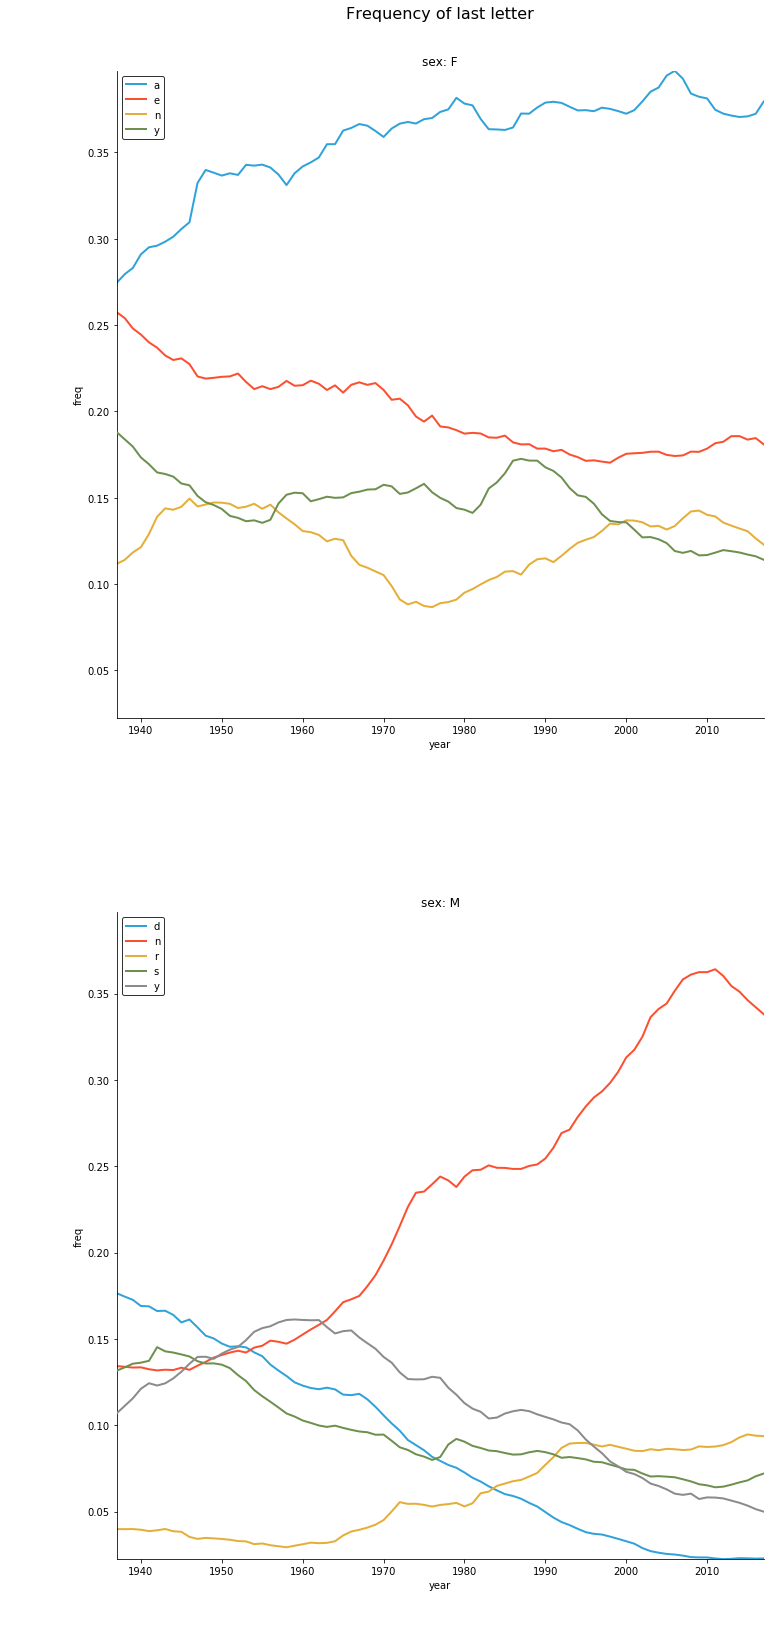

In [6]:
ds = hv.Dataset(
    pd.DataFrame(freq.loc[:,common].stack(), columns=['freq']).reset_index(),
    kdims=['sex','year','last_letter'],
    vdims='freq'
)

chart_f = ds.select(sex=['F'], last_letter=common_f).to(hv.Curve, 'year', 'freq', group='Frequency of last letter').overlay('last_letter')
chart_m = ds.select(sex=['M'], last_letter=common_m).to(hv.Curve, 'year', 'freq').overlay('last_letter')

(chart_m * chart_f).layout('sex').cols(1)

## The diversity gender gap

Let's calculate the [Shannon Entropy](https://en.wikipedia.org/wiki/Diversity_index) which is a measure of how much information the last letter of a name conveys. The highest possible value is 26 which would mean that all 26 letters are equally likely.

In [7]:
from math import log, exp
shannon = freq.applymap(lambda x:-x*log(x) if x>0 else 0).sum('columns').apply(exp)
shannon = pd.DataFrame(shannon, columns=['entropy'])
shannon.head()

entropy
year sex           
1937 F     6.488520
     M    10.906265
1938 F     6.489513
     M    10.874115
1939 F     6.528721

Unexpected style option 'line_width' for Curve in loaded backend 'matplotlib'.

Similar keywords in the currently active 'matplotlib' renderer are: ['linewidth']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.Unexpected style option 'line_width' for Curve in loaded backend 'matplotlib'.

Similar keywords in the currently active 'matplotlib' renderer are: ['linewidth']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.

:Overlay
   .Entropy_over_time.I :NdOverlay   [sex]
      :Curve   [year]   (entropy)
   .Arrow.I             :Arrow   [x,y]
   .Arrow.II            :Arrow   [x,y]
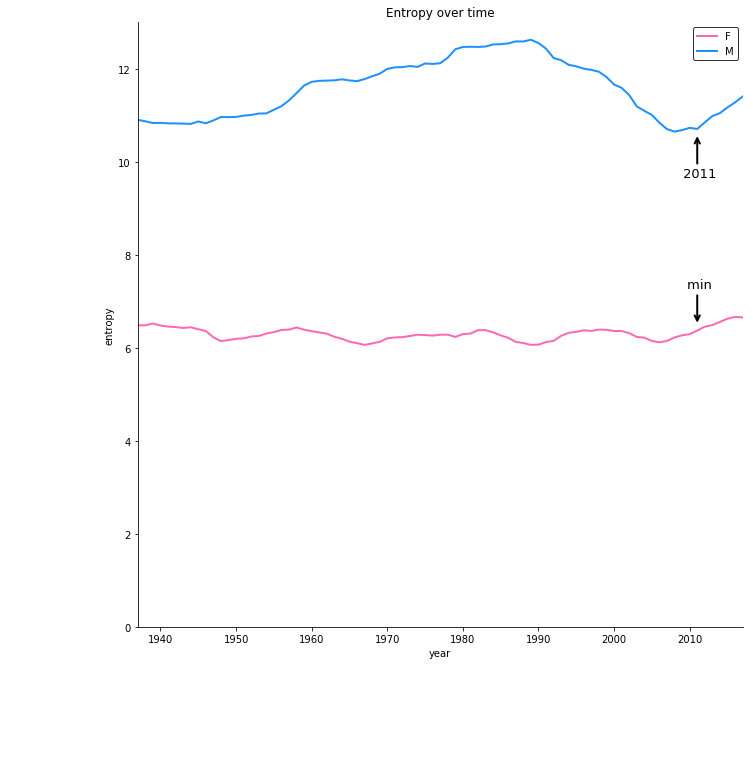

In [8]:
%%opts Curve (color=hv.Cycle(['hotpink', 'dodgerblue']) line_width=3)
%%opts NdOverlay [legend_position='bottom_right']

ds = hv.Dataset(shannon.reset_index(), kdims=['year','sex'], vdims='entropy')

ds.to(hv.Curve, 'year', 'entropy', group='Entropy over time').overlay('sex').redim.range(entropy=(0,13))\
  * hv.Arrow(2011, 6.5, ' min', 'v', arrowstyle='->') * hv.Arrow(2011, 10.6, ' 2011', '^', arrowstyle='->')

How does the gender gap look over time?

Unexpected style option 'line_width' for Curve in loaded backend 'matplotlib'.

Similar keywords in the currently active 'matplotlib' renderer are: ['linewidth']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.

:Layout
   .Overlay.I :Overlay
      .Curve.I :Curve   [year]   (gap)
      .Arrow.I :Arrow   [x,y]
   .Table.I   :Table   [year]   (gap)
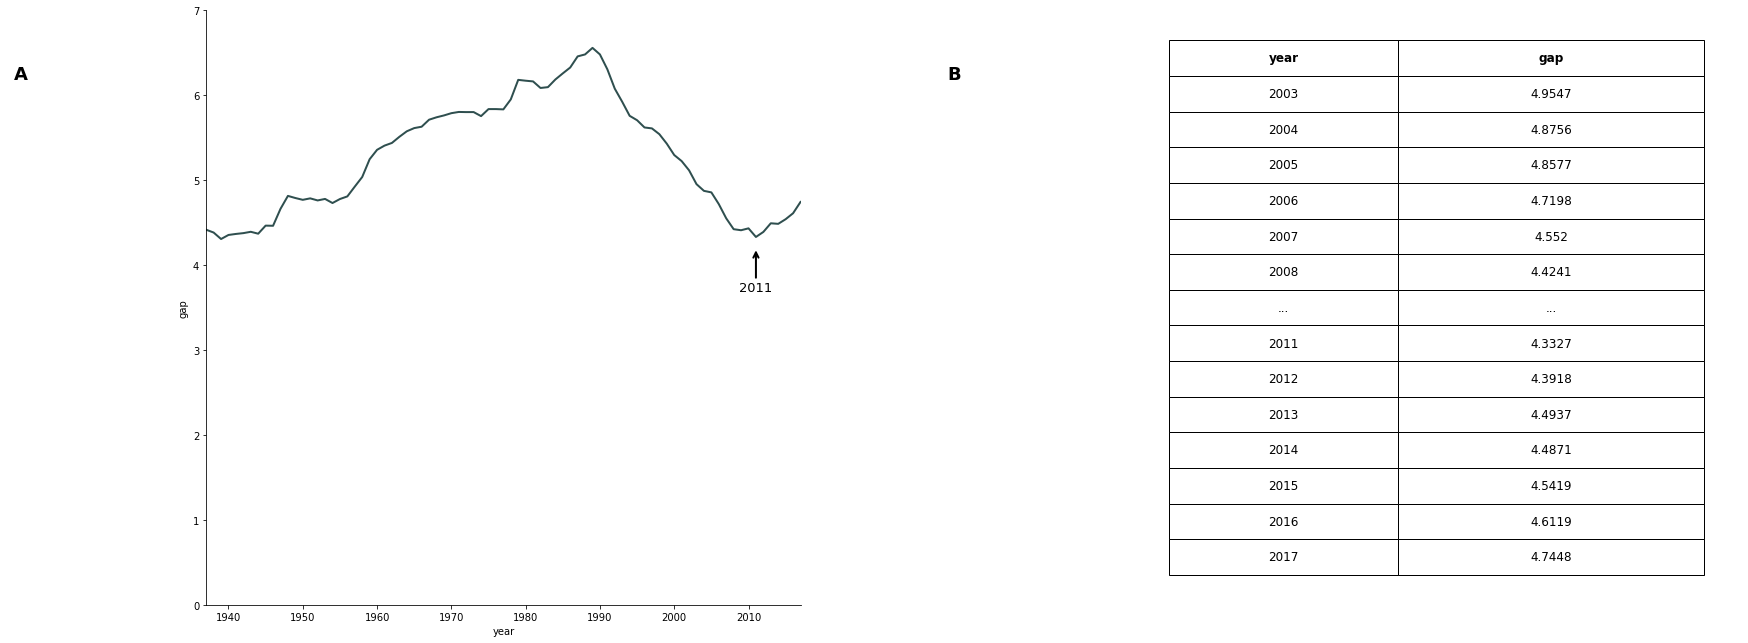

In [12]:
%%opts Curve (color='darkslategray' line_width=3) [width=200 height=140]
%%opts Table [height=400]

gap = shannon.unstack('sex')
gap.columns = gap.columns.get_level_values(1)
gap['gap'] = gap.M-gap.F

ds = hv.Dataset(gap.reset_index(), kdims=['year'], vdims='gap')

hv.Curve(ds).redim.range(gap=(0,7)) * hv.Arrow(2011, 4.2, '2011', '^') + ds.iloc[-15:,:].table()
#add .options(text_align='center') to arrow for centering in bokeh